<a href="https://www.kaggle.com/code/mohamedtahaouf/tiktok-data?scriptVersionId=192986809" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# TikTok Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#ML1">EDA.</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains information on TikTok users' reports of videos and comments that include user claims. These reports flag content for moderator review, generating a significant volume of user reports that need timely attention.

> TikTok is developing a predictive model to determine whether a video contains a claim or offers an opinion. A successful prediction model will help reduce the backlog of user reports and enable more efficient prioritization.

> This dataset is intended for exploratory data analysis (EDA), statistical analysis, and predictive modeling. It has been created for pedagogical purposes and aims to facilitate learning and research in data analysis and machine learning
            

<a id='wrangling'></a>
## Data Wrangling


> In this section we will clarify the data to analyze it and answer the questions easily.

In [1]:
# Import the laibraies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

In [2]:
# We have got an extened data
df=pd.read_csv('/kaggle/input/dataset-from-tiktok/tiktok_dataset.csv')

In [3]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
des,text = df.describe() , df.describe(include="O")
des

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [5]:
text

,claim_status,video_transcription_text,verified_status,author_ban_status
count,19084,19084,19382,19382
unique,2,19012,2,3
top,claim,a friend read in the media a claim that badmi...,not verified,active
freq,9608,2,18142,15663


In [6]:
df["claim_status"].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

In [7]:
df.loc[19084:19184,"claim_status"] = "opinion"
df.loc[19185:,"claim_status"] = "claim"
df[df["claim_status"].isna()]

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count


In [8]:
columns_to_fill = ["video_view_count", "video_like_count", "video_share_count", "video_download_count", "video_comment_count"]

for column in columns_to_fill:
    df[column].fillna(df[column].mean(), inplace=True)


/tmp/ipykernel_17/2458409371.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [9]:
df=df.drop(columns=['#',"video_transcription_text"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_status          19382 non-null  object 
 1   video_id              19382 non-null  int64  
 2   video_duration_sec    19382 non-null  int64  
 3   verified_status       19382 non-null  object 
 4   author_ban_status     19382 non-null  object 
 5   video_view_count      19382 non-null  float64
 6   video_like_count      19382 non-null  float64
 7   video_share_count     19382 non-null  float64
 8   video_download_count  19382 non-null  float64
 9   video_comment_count   19382 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [11]:
df.isna().sum()

claim_status            0
video_id                0
video_duration_sec      0
verified_status         0
author_ban_status       0
video_view_count        0
video_like_count        0
video_share_count       0
video_download_count    0
video_comment_count     0
dtype: int64

In [12]:
df.describe()

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,1.938200e+04,19382.000000,19382.000000,19382.000000,19382.000000,19382.000000,19382.000000
mean,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,2.536440e+09,16.229967,320401.279776,132390.843934,31788.928017,1988.831262,793.467473
min,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430417e+09,18.000000,5026.250000,833.000000,119.000000,7.000000,1.000000
50%,5.618664e+09,32.000000,22805.500000,3705.500000,777.500000,49.000000,10.000000
75%,7.843960e+09,47.000000,496858.000000,122187.500000,17713.750000,1121.750000,324.000000
max,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [13]:
# describe the descriptive & continuousvalues
df.describe(include="O")

,claim_status,verified_status,author_ban_status
count,19382,19382,19382
unique,2,2,3
top,claim,not verified,active
freq,9805,18142,15663


In [14]:
df.drop_duplicates(df,inplace=True)
df.duplicated().sum()

0

<a id='ML1'></a>
## EDA (Exploratory Data Analysis)

In [15]:
from IPython.display import display

print("The highest video views:")
display(df[df["video_view_count"] == df["video_view_count"].max()])

print("The most shared video:")
display(df[df["video_share_count"] == df["video_share_count"].max()])

print("The most like video")
display(df[df["video_like_count"] == df["video_like_count"].max()])

The highest video views:


,claim_status,video_id,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
9273,claim,5491664721,16,not verified,active,999817.0,385415.0,63849.0,5330.0,2475.0


The most shared video:


,claim_status,video_id,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
2446,claim,9715423156,46,not verified,active,997365.0,657830.0,256130.0,4908.0,904.0


The most like video


,claim_status,video_id,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
2446,claim,9715423156,46,not verified,active,997365.0,657830.0,256130.0,4908.0,904.0


Text(0.5, 1.0, 'author_ban_status')

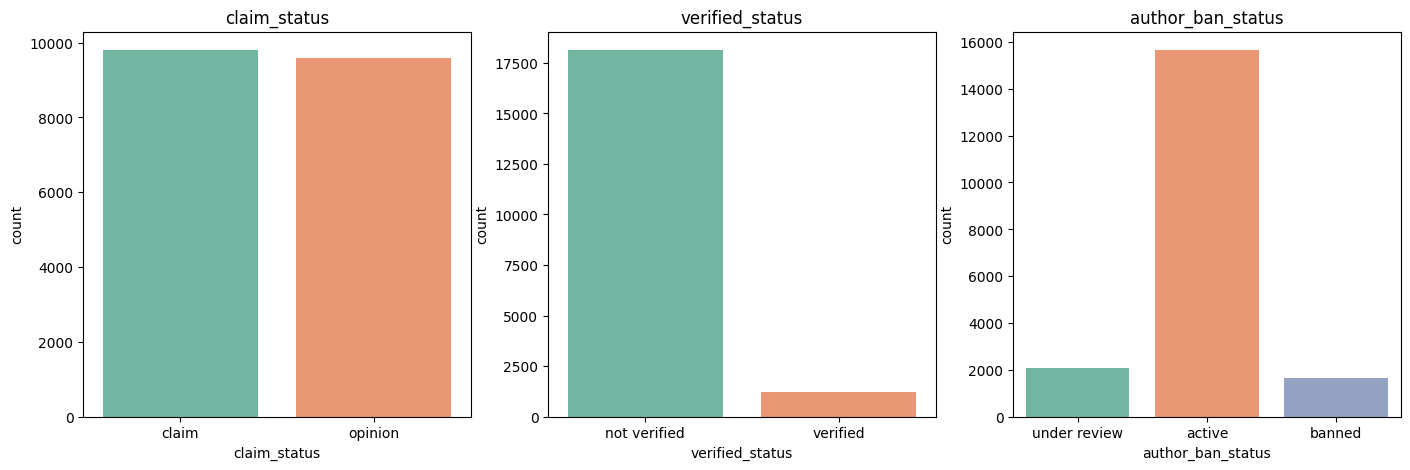

In [16]:
fig, axs = plt.subplots(ncols=3, figsize=(17,5))

sns.countplot(data=df,x="claim_status", palette="Set2",ax=axs[0])
axs[0].set_title('claim_status')

sns.countplot(data=df,x="verified_status", palette="Set2",ax=axs[1])
axs[1].set_title('verified_status')

sns.countplot(data=df,x="author_ban_status", palette="Set2",ax=axs[2])
axs[2].set_title('author_ban_status')

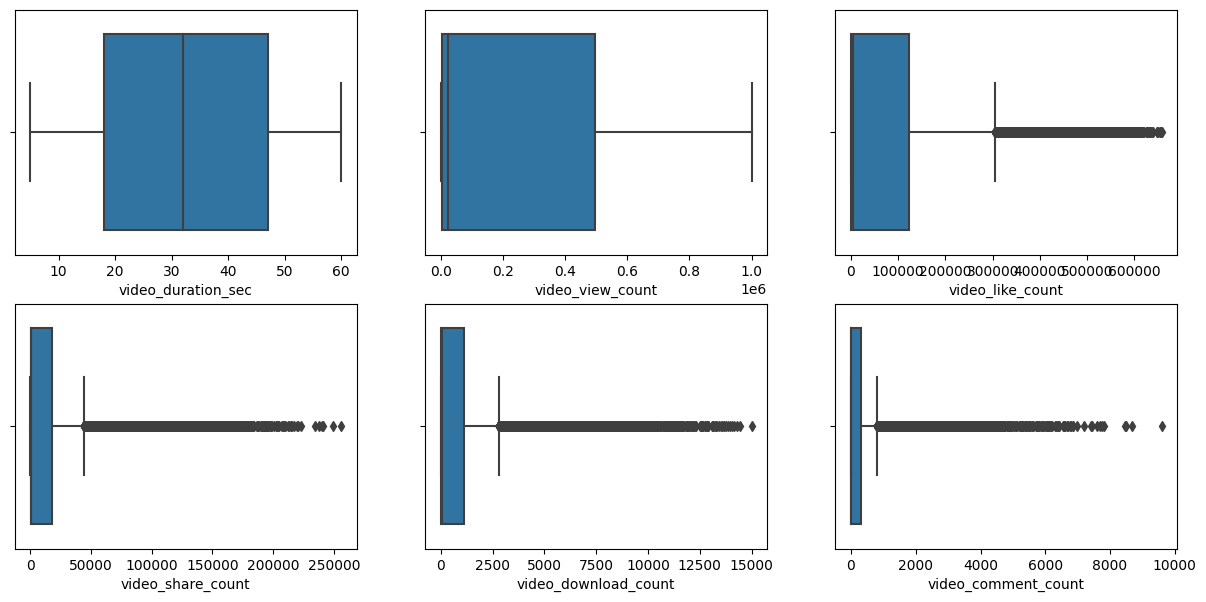

In [17]:
# Figure out the outlier using boxplot
col = ["video_duration_sec","video_view_count","video_like_count","video_share_count","video_download_count","video_comment_count"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
axes = axes.flatten()

for i, column in enumerate(col):
    sns.boxplot(data=df,x= column,ax=axes[i])